In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

In [2]:
horvath_coef = pd.read_csv("../data/gb-2013-14-10-r115-S3.csv")
markers = horvath_coef["CpGmarker"]
coefs = horvath_coef["CoefficientTraining"]

In [3]:
horvath_chrs = utils.get_chrs_from_markers('../data/hm450.hg19.manifest.bed', markers)

In [4]:
data = pd.read_csv("../data/zeroes_imputed_cytosines.tsv", sep='\t')

In [5]:
chromosomes_arr, positions_arr = np.transpose([name.split(".") for name in data.values[:, 0]])
positions_arr = positions_arr.astype(int)

In [10]:
horvath_features = utils.get_imputed_features(chromosomes_arr, positions_arr, data.values, horvath_chrs)
horvath_features.shape

100%|██████████| 353/353 [00:00<00:00, 4974.78it/s]


(353, 40)

In [17]:
predicted_age = utils.apply_horvath(horvath_features, coefs)

In [18]:
real_age = pd.read_csv("../data/RRBS.phase1_yo_datasets.Monocyte.tsv", sep='\t')
real_age["Donor Age"] - predicted_age

0      8.187535
1     12.263889
2      5.841563
3      2.345225
4     -6.853162
5      1.979194
6      0.808556
7      7.427740
8      2.767025
9      4.620380
10     2.157906
11    -2.547696
12     0.553146
13     5.967245
14     0.353943
15    -1.384022
16     1.492177
17     0.279335
18     4.835776
19     2.489209
20    48.557420
21    52.743752
22    48.585443
23    48.882766
24    47.436827
25    50.126846
26    40.556416
27    42.451424
28    44.400607
29    43.591727
30    43.821202
31    45.595684
32    58.440347
33    49.754599
34    48.375483
35    44.220510
36    55.271168
37    56.967941
38    53.984570
39    55.270925
Name: Donor Age, dtype: float64

In [19]:
def label(index):
    return 0 if index[0] == "Y" else 1
labels = real_age["Donor ID"].apply(label)

Text(0, 0.5, 'predicted age')

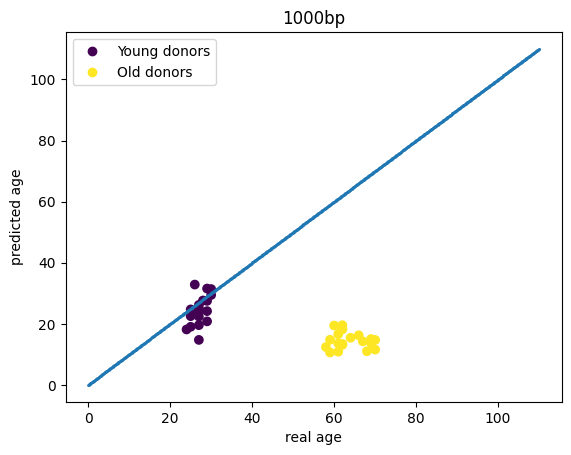

In [21]:
scatter1 = plt.scatter(real_age["Donor Age"].astype(np.float64), predicted_age.astype(np.float64), c=labels)
plt.scatter(np.linspace(0, 110, 1000), np.linspace(0, 110, 1000), s=1)
plt.legend(handles=scatter1.legend_elements()[0], labels=["Young donors", "Old donors"])
plt.title("1000bp")
plt.xlabel('real age')
plt.ylabel('predicted age')

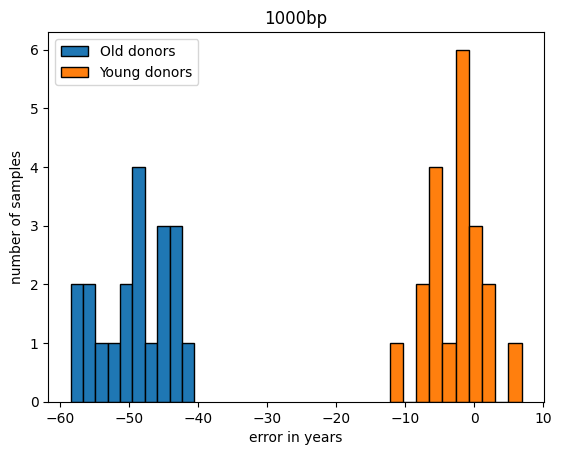

In [ ]:
errors = predicted_age.astype(np.float64) - real_age["Donor Age"].astype(np.float64)
plt.hist(errors[labels.astype(bool)], ec="k", label="Old donors")
plt.hist(errors[np.invert(labels.astype(bool))], ec="k", label="Young donors")
plt.xlabel("error in years")  
plt.ylabel("number of samples")
plt.title("1000bp")
plt.legend()